<a href="https://colab.research.google.com/github/KimJisanER/code_jjambbong/blob/main/SoM_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install rdkit

In [2]:
from __future__ import print_function
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
def load_sdf_file(file_path):
    sanitized_mols = []
    suppl = Chem.SDMolSupplier(file_path)
    n=0
    for x in suppl:
      if x is not None:
          try:
              x_with_h = Chem.AddHs(x, addCoords=True)
              Chem.SanitizeMol(x_with_h)
              sanitized_mols.append(x_with_h)
          except:
              sanitized_mols.append('')
      else:
          print('check:',n)
      n+=1

    df = PandasTools.LoadSDF(file_path)
    df['Molecules'] = sanitized_mols
    return df

In [6]:
non_substrate = load_sdf_file('/content/drive/MyDrive/SoM_Dataset/Decoys_cypreact_Drug_like_0710.sdf')
substrate = load_sdf_file('/content/drive/MyDrive/SoM_Dataset/train_0712.sdf')
substrate_test = load_sdf_file('/content/drive/MyDrive/SoM_Dataset/test_0712.sdf')
# substrate_test2 = load_sdf_file('/content/drive/MyDrive/SoM_Dataset/EBoMD_Test_0611.sdf')

[01:38:05] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 3 ignored
[01:38:05] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 7 ignored
[01:38:05] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 3 ignored
[01:38:05] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 7 ignored


In [7]:
full_substrate= pd.concat([substrate, substrate_test], axis=0).reset_index(drop=True)
# full_substrate = substrate
check_neg_data = full_substrate[['BOM_1A2',	'BOM_2A6',	'BOM_2B6',	'BOM_2C8',	'BOM_2C9',	'BOM_2C19',	'BOM_2D6',	'BOM_2E1',	'BOM_3A4']].replace('', np.nan)
empty_rows = check_neg_data[check_neg_data.isnull().all(axis=1)]
empty_rows_index = [index for index in empty_rows.index.tolist()]
positive_substrate = full_substrate[~check_neg_data.index.isin(empty_rows_index)].reset_index(drop=True)
negative_substrate = full_substrate[check_neg_data.index.isin(empty_rows_index)].reset_index(drop=True)

In [8]:
from rdkit.Chem import Descriptors

def calculate_molecular_properties(df, mol_column):

    df['Molecular Weight'] = df[mol_column].apply(lambda mol: round(Descriptors.MolWt(mol), 1) if mol else None)
    df['LogP'] = df[mol_column].apply(lambda mol: round(Descriptors.MolLogP(mol), 1) if mol else None)
    df['TPSA'] = df[mol_column].apply(lambda mol: round(Descriptors.TPSA(mol), 1) if mol else None)

    return df

,InChIKey,PubChem_CID,BOM_1A2,BOM_2A6,BOM_2B6,BOM_2C8,BOM_2C9,BOM_2C19,BOM_2D6,BOM_2E1,BOM_3A4,References,FLAG_COMMENTS,ID,ROMol,Molecules
0,IOOWNWLVCOUUEX-WPRPVWTQSA-N,,,,,,,,,,,VABOMERE (meropenem and vaborbactam) for injec...,Vaborbactam does not undergo metabolism.,Vaborbactam,,
1,DQMZLTXERSFNPB-UHFFFAOYSA-N,4909,,,,,"<10,H;Oxidation;R1>\n<10,4;Dealkylation;R1><10...","<10,H;Oxidation;R1>\n<10,4;Dealkylation;R1><10...",,"<10,H;Oxidation;R1>\n<10,4;Dealkylation;R1><10...",,"Hedera, Peter, FrantišEk Cibulčík, and Thomas ...",,Primidone,,
2,MYSWGUAQZAJSOK-UHFFFAOYSA-N,2764,"<16,H;Oxidation;R1>/<17,H;Oxidation;R1>\n<20,7...",,,,,,,,,"Al-Omar, Mohammed A. ""Ciprofloxacin: Drug meta...",,ciprofloxacin,,
3,RUEYEZADQJCKGV-UHFFFAOYSA-N,91617630,,,,"<21,H;Hydroxylation;R1><20,H;Hydroxylation;R1>...",,,,,"<21,H;Hydroxylation;R1><20,H;Hydroxylation;R1>...","Johnson, Brendan M., Brendt A. Stier, and Step...",,Daprodustat,,
4,KDGFLJKFZUIJMX-UHFFFAOYSA-N,49806720,,,,,,,,,"<16,4;Dealkylation;R1><16,H;Dealkylation;R1><2...","Sato-Nakai M, Kawashima K, Nakagawa T, Tachiba...",,Alectinib,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,WLOBUUJURNEQCL-UHFFFAOYNA-N,,,,,"<16,17;Dealkylation;R1><17,H;Dealkylation;R1>",,,,,"<1,2;Dealkylation;R1><2,H;Dealkylation;R1>","Brown CM, Reisfeld B, Mayeno AN. Cytochromes P...",,D-617,,
1021,VPIXQGUBUKFLRF-UHFFFAOYSA-N,,"<20,21;Dealkylation;R1><21,H;Dealkylation;R1>",,,,,"<20,21;Dealkylation;R1><21,H;Dealkylation;R1>","<2,H;Hydroxylation;R2>",,"<20,21;Dealkylation;R1><21,H;Dealkylation;R1>","Wang B, Zhou SF. Synthetic and natural compoun...",,N-Desmethylclomipramine,,
1022,AGSLYHYWLYGAOU-UHFFFAOYSA-N,,"<11,12;Dealkylation;R1><12,H;Dealkylation;R1>",,,,"<11,12;Dealkylation;R1><12,H;Dealkylation;R1>","<11,12;Dealkylation;R1><12,H;Dealkylation;R1>","<11,12;Dealkylation;R1><12,H;Dealkylation;R1>",,,"Wang B, Zhou SF. Synthetic and natural compoun...",,N-Desmethyldiphenhydramine,,
1023,UUFAJPMQSFXDFR-LLVKDONJSA-N,185859,,"<1,8;Dealkylation;R1><8,H;Dealkylation;R1>","<1,8;Dealkylation;R1><8,H;Dealkylation;R1>",,,,,,"<1,8;Dealkylation;R1><8,H;Dealkylation;R1>","Rendic, Slobodan. ""Summary of information on h...",,Desmethylselegiline,,

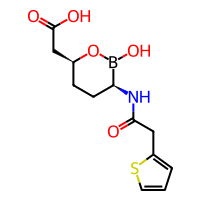
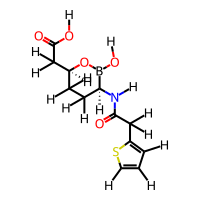
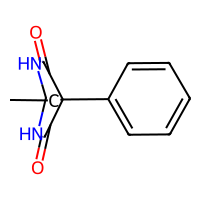
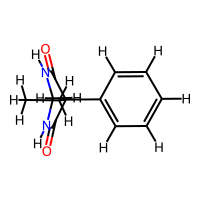
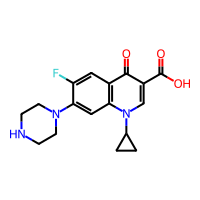
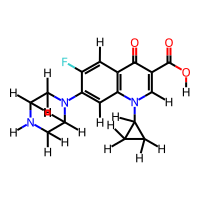
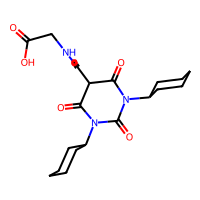
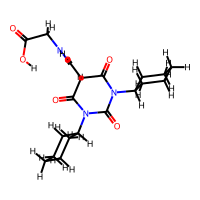
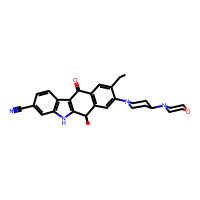
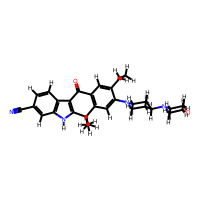
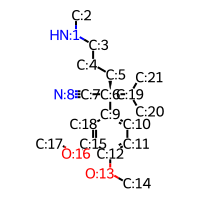
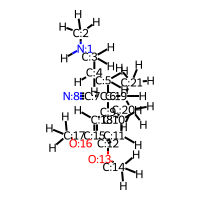
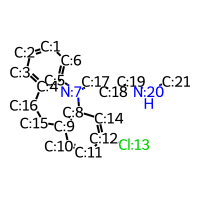
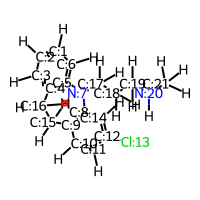
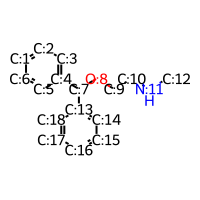
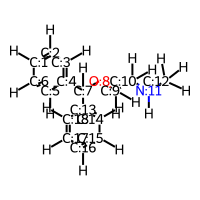
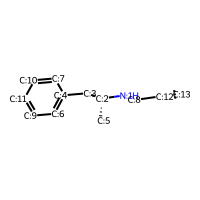
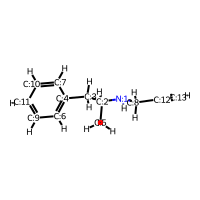
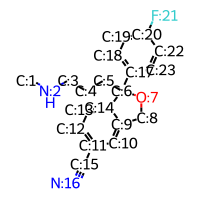
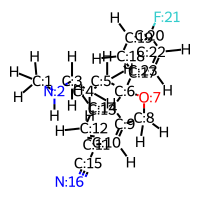

In [ ]:
substrate

In [ ]:
print(len(non_substrate))

724


In [ ]:
negative_substrate

,InChIKey,PubChem_CID,BOM_1A2,BOM_2A6,BOM_2B6,BOM_2C8,BOM_2C9,BOM_2C19,BOM_2D6,BOM_2E1,BOM_3A4,References,FLAG_COMMENTS,ID,ROMol,Molecules
0,IOOWNWLVCOUUEX-WPRPVWTQSA-N,,,,,,,,,,,VABOMERE (meropenem and vaborbactam) for injec...,Vaborbactam does not undergo metabolism.,Vaborbactam,<rdkit.Chem.rdchem.Mol object at 0x7da512930970>,<rdkit.Chem.rdchem.Mol object at 0x7da51290c510>
1,AQCHWTWZEMGIFD-UHFFFAOYSA-N,4170,,,,,,,,,,"Lowenthal, David T., and Leroy Shear. ""Use of ...",Not substantially metabolized. 70-95% is excre...,Metolazone,<rdkit.Chem.rdchem.Mol object at 0x7da512930c80>,<rdkit.Chem.rdchem.Mol object at 0x7da51290c740>
2,AAQOQKQBGPPFNS-UHFFFAOYSA-N,2431,,,,,,,,,,"Anderson, J. L. ""Bretylium tosylate: profile o...",No metabolites have been identified following ...,Bretylium,<rdkit.Chem.rdchem.Mol object at 0x7da512932110>,<rdkit.Chem.rdchem.Mol object at 0x7da51290da80>
3,VJYSBPDEJWLKKJ-NLIMODCCSA-N,,,,,,,,,,,MAVYRETTM (glecaprevir and pibrentasvir) table...,Pibrentasvir is not metabolized.,Pibrentasvir,<rdkit.Chem.rdchem.Mol object at 0x7da512932650>,<rdkit.Chem.rdchem.Mol object at 0x7da51290dfc0>
4,GBLRQXKSCRCLBZ-UHFFFAOYSA-N,,,,,,,,,,,"Dresner, David L., et al. ""Pharmacokinetics an...",In vivo data from humans suggest that doxacuri...,Doxacurium,<rdkit.Chem.rdchem.Mol object at 0x7da5129326c0>,<rdkit.Chem.rdchem.Mol object at 0x7da51290e030>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,IDUYJRXRDSPPRC-NRFANRHFSA-N,77050711,,,,,,,,,,FDA Approved Drug Products: Vivjoa (oteseconaz...,Oteseconazole does not undergo significant met...,Oteseconazole,<rdkit.Chem.rdchem.Mol object at 0x7da5116519a0>,<rdkit.Chem.rdchem.Mol object at 0x7da511636b20>
88,SMOBCLHAZXOKDQ-ZJUUUORDSA-N,121301826,,,,,,,,,,FDA Approved Drug Products: Recarbrio (imipene...,Relebactam does not undergo significant metabo...,Relebactam,<rdkit.Chem.rdchem.Mol object at 0x7da511651b60>,<rdkit.Chem.rdchem.Mol object at 0x7da511636c70>
89,IWUCXVSUMQZMFG-AFCXAGJDSA-N,37542,,,,,,,,,,FDA Approved Drug Products: Rebetol (ribavirin...,In vitro studies indicate that ribavirin is n...,Ribavirin,<rdkit.Chem.rdchem.Mol object at 0x7da511652810>,<rdkit.Chem.rdchem.Mol object at 0x7da511637920>
90,WRYIIOKOQSICTB-UHFFFAOYSA-N,10477896,,,,,,,,,,FDA Approved Drug Products: MIEBO (perfluorohe...,Perfluorohexyloctane was not metabolized by hu...,Perfluorohexyloctane,<rdkit.Chem.rdchem.Mol object at 0x7da511652ff0>,<rdkit.Chem.rdchem.Mol object at 0x7da511650120>


In [ ]:
positive_substrate['Group'] = 'Positive'
non_substrate['Group'] = 'Decoys'
negative_substrate['Group'] = 'Negative'

In [ ]:
from rdkit import DataStructs
from rdkit.Chem import AllChem

class FP:
    """
    Molecular fingerprint class, useful to pack features in pandas df

    Parameters
    ----------
    fp : np.array
        Features stored in numpy array
    names : list, np.array
        Names of the features
    """
    def __init__(self, fp, names):
        self.fp = fp
        self.names = names
    def __str__(self):
        return "%d bit FP" % len(self.fp)
    def __len__(self):
        return len(self.fp)

def get_cfps(mol, radius=2, nBits=4096, useFeatures=False, counts=False, dtype=np.float32):
    """Calculates circular (Morgan) fingerprint.
    http://rdkit.org/docs/GettingStartedInPython.html#morgan-fingerprints-circular-fingerprints

    Parameters
    ----------
    mol : rdkit.Chem.rdchem.Mol
    radius : float
        Fingerprint radius, default 2
    nBits : int
        Length of hashed fingerprint (without descriptors), default 1024
    useFeatures : bool
        To get feature fingerprints (FCFP) instead of normal ones (ECFP), defaults to False
    counts : bool
        If set to true it returns for each bit number of appearances of each substructure (counts). Defaults to false (fingerprint is binary)
    dtype : np.dtype
        Numpy data type for the array. Defaults to np.float32 because it is the default dtype for scikit-learn

    Returns
    -------
    ML.FP
        Fingerprint (feature) object
    """
    arr = np.zeros((1,), dtype)

    if counts is True:
        info = {}
        fp = AllChem.GetHashedMorganFingerprint(mol, radius, nBits, useFeatures=useFeatures)
        DataStructs.ConvertToNumpyArray(fp, arr)
    else:
        DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits, useFeatures=useFeatures), arr)
    return FP(arr, range(nBits))

In [ ]:
df= pd.concat([positive_substrate, negative_substrate, non_substrate], axis=0).reset_index(drop=True)

In [ ]:
df

,InChIKey,PubChem_CID,BOM_1A2,BOM_2A6,BOM_2B6,BOM_2C8,BOM_2C9,BOM_2C19,BOM_2D6,BOM_2E1,...,2A6,2B6,2C8,2C9,2C19,2D6,2E1,3A4,Citation,Drug_like
0,DQMZLTXERSFNPB-UHFFFAOYSA-N,4909,,,,,"<10,H;Oxidation;R1>\n<10,4;Dealkylation;R1><10...","<10,H;Oxidation;R1>\n<10,4;Dealkylation;R1><10...",,"<10,H;Oxidation;R1>\n<10,4;Dealkylation;R1><10...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MYSWGUAQZAJSOK-UHFFFAOYSA-N,2764,"<16,H;Oxidation;R1>/<17,H;Oxidation;R1>\n<20,7...",,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RUEYEZADQJCKGV-UHFFFAOYSA-N,91617630,,,,"<21,H;Hydroxylation;R1><20,H;Hydroxylation;R1>...",,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KDGFLJKFZUIJMX-UHFFFAOYSA-N,49806720,,,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WOSKHXYHFSIKNG-UHFFFAOYSA-N,9823820,"<30,4;Dealkylation;R2><30,H;Dealkylation;R2>","<30,4;Dealkylation;R2><30,H;Dealkylation;R2>","<30,4;Dealkylation;R2><30,H;Dealkylation;R2>\n...",,,"<30,4;Dealkylation;R2><30,H;Dealkylation;R2>",,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,Nucleic Acids Res. 2018. Jan 4;46(D1):D608-17....,True
1847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,Nucleic Acids Res. 2018. Jan 4;46(D1):D608-17....,True
1848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,Nucleic Acids Res. 2018. Jan 4;46(D1):D608-17....,True
1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,Nucleic Acids Res. 2018. Jan 4;46(D1):D608-17....,True


In [ ]:
df['FP'] = df['ROMol'].map(get_cfps)

[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerator
[04:10:43] DEPRECATION WARNING: please use MorganGenerat

# **PCA analysis**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X = np.array([x.fp for x in df['FP']])

In [ ]:
X.shape

(1851, 4096)

In [ ]:
pca = PCA(n_components=3, random_state=0)
pca_drugs = pca.fit_transform(X)

In [ ]:
df['PC1'] = pca_drugs.T[0]
df['PC2'] = pca_drugs.T[1]
df['PC3'] = pca_drugs.T[2]

In [ ]:
df

,InChIKey,PubChem_CID,BOM_1A2,BOM_2A6,BOM_2B6,BOM_2C8,BOM_2C9,BOM_2C19,BOM_2D6,BOM_2E1,...,2C19,2D6,2E1,3A4,Citation,Drug_like,FP,PC1,PC2,PC3
0,DQMZLTXERSFNPB-UHFFFAOYSA-N,4909,,,,,"<10,H;Oxidation;R1>\n<10,4;Dealkylation;R1><10...","<10,H;Oxidation;R1>\n<10,4;Dealkylation;R1><10...",,"<10,H;Oxidation;R1>\n<10,4;Dealkylation;R1><10...",...,NaN,NaN,NaN,NaN,NaN,NaN,4096 bit FP,-0.731525,-0.299785,-0.242593
1,MYSWGUAQZAJSOK-UHFFFAOYSA-N,2764,"<16,H;Oxidation;R1>/<17,H;Oxidation;R1>\n<20,7...",,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,4096 bit FP,-0.055246,-0.690660,1.086495
2,RUEYEZADQJCKGV-UHFFFAOYSA-N,91617630,,,,"<21,H;Hydroxylation;R1><20,H;Hydroxylation;R1>...",,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,4096 bit FP,0.941241,0.167461,1.136323
3,KDGFLJKFZUIJMX-UHFFFAOYSA-N,49806720,,,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,4096 bit FP,-0.502321,-1.705318,0.136006
4,WOSKHXYHFSIKNG-UHFFFAOYSA-N,9823820,"<30,4;Dealkylation;R2><30,H;Dealkylation;R2>","<30,4;Dealkylation;R2><30,H;Dealkylation;R2>","<30,4;Dealkylation;R2><30,H;Dealkylation;R2>\n...",,,"<30,4;Dealkylation;R2><30,H;Dealkylation;R2>",,,...,NaN,NaN,NaN,NaN,NaN,NaN,4096 bit FP,-1.285810,-0.576373,1.086426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,Nucleic Acids Res. 2018. Jan 4;46(D1):D608-17....,True,4096 bit FP,2.305099,-1.091574,0.592684
1847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,Nucleic Acids Res. 2018. Jan 4;46(D1):D608-17....,True,4096 bit FP,0.453177,-1.017262,-0.728189
1848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,Nucleic Acids Res. 2018. Jan 4;46(D1):D608-17....,True,4096 bit FP,0.505232,0.929312,-1.077608
1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,Nucleic Acids Res. 2018. Jan 4;46(D1):D608-17....,True,4096 bit FP,0.933179,1.379595,-0.130786


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors

# 'Set2' 팔레트에서 색상 코드를 추출합니다.
set2_palette = sns.color_palette('Set2')

# 색상 코드를 hex 형식으로 변환합니다.
set2_palette_hex = [mcolors.rgb2hex(color) for color in set2_palette]

# 색상 코드를 출력합니다.
print(set2_palette_hex)

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


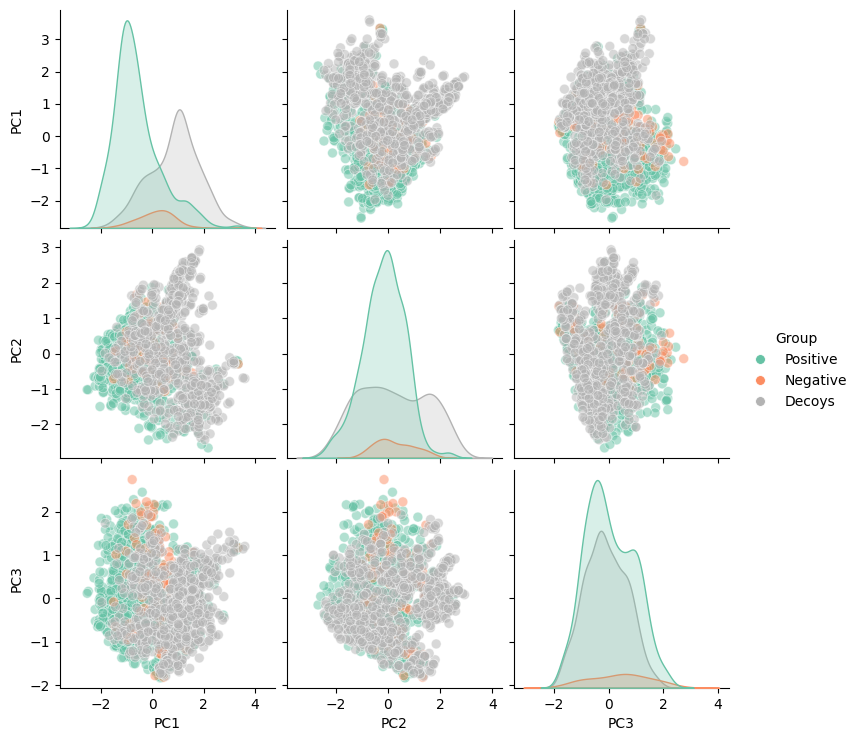

In [ ]:
### legend 점 크기 때문에 legend만 가져갈려고 써놓은 코드

import seaborn as sns
import matplotlib.pyplot as plt

# 원하는 색상을 지정합니다.
custom_palette = ['#66c2a5','#fc8d62', '#b3b3b3']

# 점의 크기를 작게 설정합니다.
plot_kws = {'s': 50}  # s는 점의 크기를 의미합니다. 원하는 크기로 설정하세요.

g = sns.pairplot(df, hue='Group', vars=['PC1', 'PC2', 'PC3'], palette=custom_palette, plot_kws=plot_kws)

for ax in g.axes.flatten():
    if not ax is None:
        for artist in ax.collections:
            artist.set_alpha(0.5)

plt.savefig('/content/drive/MyDrive/metabolism_figure/structures_0613_2048_for_legend.png', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
from sklearn.manifold import TSNE

###With PCA preprocessing

In case of high dimensionality data (like molecular fingerprints) it is recommended to reduce the number of dimensions with another method before proceeding with t-SNE.

In [ ]:
pca_model = PCA(n_components=30, random_state=0)
tsne_model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_pca_drugs = tsne_model.fit_transform(pca_model.fit_transform(X))

In [ ]:
df['TSNE_PCA_C1'] = tsne_pca_drugs.T[0]
df['TSNE_PCA_C2'] = tsne_pca_drugs.T[1]

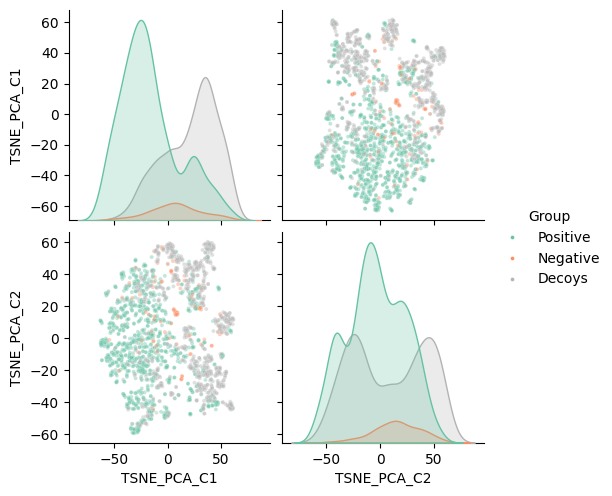

In [ ]:

custom_palette = ['#66c2a5','#fc8d62', '#b3b3b3']

plot_kws = {'s': 8}  # s는 점의 크기를 의미합니다. 원하는 크기로 설정하세요.

g = sns.pairplot(df, hue='Group', vars=['TSNE_PCA_C1', 'TSNE_PCA_C2'], palette=custom_palette, plot_kws=plot_kws)

for ax in g.axes.flatten():
    if not ax is None:
        for artist in ax.collections:
            artist.set_alpha(0.4)

plt.savefig('/content/drive/MyDrive/metabolism_figure/structures_0717_TSNE_PCA.png', dpi=1000, bbox_inches='tight')
plt.show()


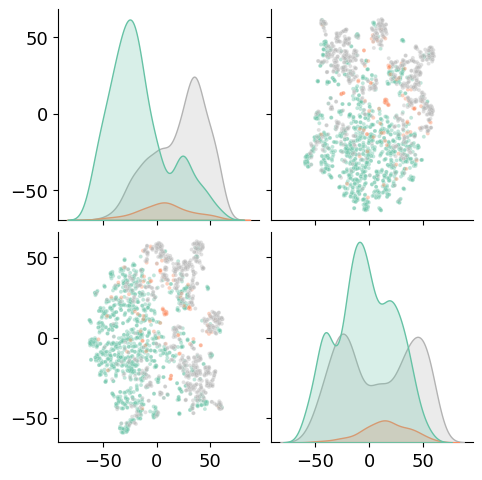

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = ['#66c2a5','#fc8d62', '#b3b3b3']

plot_kws = {'s': 8}  # s는 점의 크기를 의미합니다. 원하는 크기로 설정하세요.

g = sns.pairplot(df, hue='Group', vars=['TSNE_PCA_C1', 'TSNE_PCA_C2'], palette=custom_palette, plot_kws=plot_kws)

for ax in g.axes.flatten():
    if not ax is None:
        # 점의 투명도 설정
        for artist in ax.collections:
            artist.set_alpha(0.4)
        # x축, y축 이름 제거
        ax.set_xlabel('')
        ax.set_ylabel('')

g.tick_params(axis='both', which='major', labelsize=13)

# 범례 제거
if g._legend:
    g._legend.remove()

plt.savefig('/content/drive/MyDrive/metabolism_figure/structures_0717_TSNE_PCA.png', dpi=1000, bbox_inches='tight')
plt.show()


Tutorial author: Samo Turk, Jan. 2017

In [ ]:
train = calculate_molecular_properties(substrate, 'ROMol')
decoys = calculate_molecular_properties( non_substrate,'ROMol')
test_full = calculate_molecular_properties(substrate_test, 'ROMol')

train['Group'] = 'Train'
decoys['Group'] = 'Decoys_train'
test_full['Group'] = 'Test'

train['Split'] = 'Train'
decoys['Split'] = 'Decoys_train'
test_full['Split'] = 'Test'

In [ ]:
data_full = pd.concat([train, decoys, test_full], axis=0).reset_index(drop=True)

In [ ]:
train_test = pd.concat([train, test_full], axis=0).reset_index(drop=True)

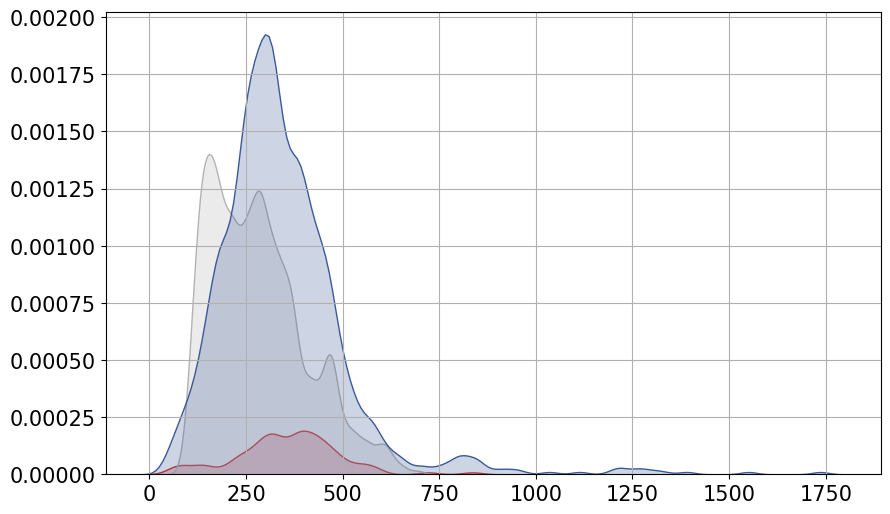

In [ ]:
sorted_weights = np.sort(data_full['Molecular Weight'])
cdf = np.arange(1, len(sorted_weights) + 1) / len(sorted_weights)

custom_palette_blrg = ['#3b5998', '#b3b3b3', '#d62728']

# 그래프 그리기
plt.figure(figsize=(10, 6))
g = sns.kdeplot(data=data_full, x='Molecular Weight', hue='Group', bw_adjust=0.5, fill=True, palette=custom_palette_blrg)

plt.grid(True)

# 점의 투명도 설정
# for artist in g.collections:
#     artist.set_alpha(0.4)

# x축, y축 이름 제거
g.set_xlabel('')
g.set_ylabel('')

g.tick_params(axis='both', which='major', labelsize=15)

# 범례 제거
legend = g.get_legend()
if legend:
    legend.remove()

plt.savefig('/content/drive/MyDrive/metabolism_figure/MW_0717_train_test.png', dpi=1000, bbox_inches='tight')
plt.show()

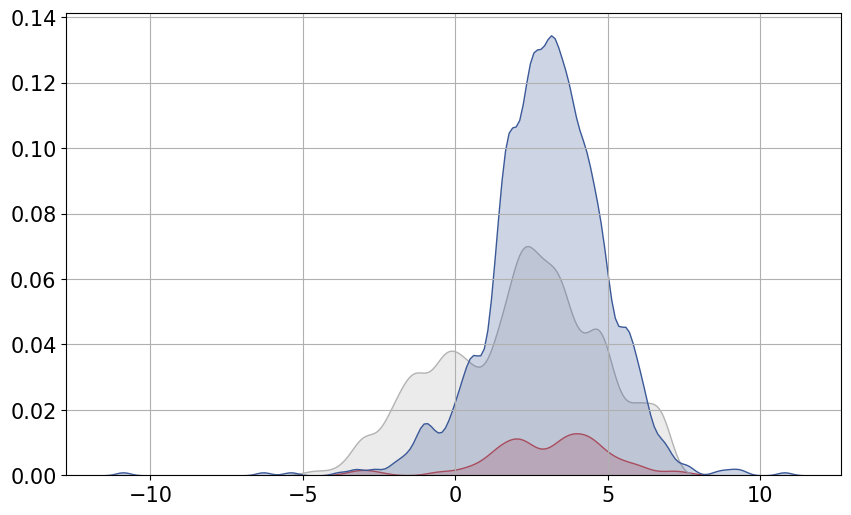

In [ ]:
sorted_weights = np.sort(data_full['LogP'])
cdf = np.arange(1, len(sorted_weights) + 1) / len(sorted_weights)

# 그래프 그리기
plt.figure(figsize=(10, 6))
g = sns.kdeplot(data=data_full, x='LogP', hue='Group', bw_adjust=0.5, fill=True, palette=custom_palette_blrg)
plt.grid(True)

# 점의 투명도 설정
# for artist in g.collections:
#     artist.set_alpha(0.4)

# x축, y축 이름 제거
g.set_xlabel('')
g.set_ylabel('')
g.tick_params(axis='both', which='major', labelsize=15)

# 범례 제거
legend = g.get_legend()
if legend:
    legend.remove()

plt.savefig('/content/drive/MyDrive/metabolism_figure/LogP_0717_train_test.png', dpi=1000, bbox_inches='tight')
plt.show()

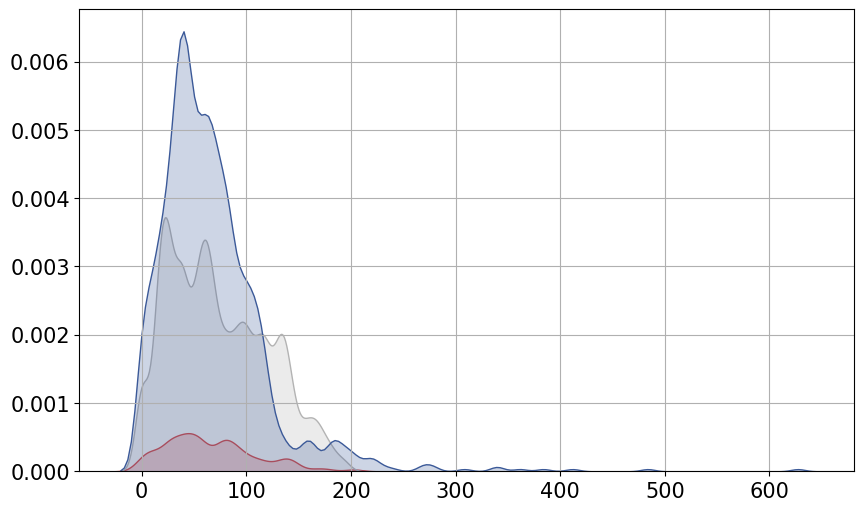

In [ ]:
sorted_weights = np.sort(data_full['TPSA'])
cdf = np.arange(1, len(sorted_weights) + 1) / len(sorted_weights)

# 그래프 그리기
plt.figure(figsize=(10, 6))
g = sns.kdeplot(data=data_full, x='TPSA', hue='Group', bw_adjust=0.5, fill=True, palette=custom_palette_blrg)
# plt.xlabel('TPSA')
# plt.ylabel('Density')
# plt.title('Probability Density Function of TPSA by Group')
plt.grid(True)

# x축, y축 이름 제거
g.set_xlabel('')
g.set_ylabel('')
g.tick_params(axis='both', which='major', labelsize=15)

# 범례 제거
legend = g.get_legend()
if legend:
    legend.remove()

plt.savefig('/content/drive/MyDrive/metabolism_figure/TPSA_0717_train_test.png', dpi=1000, bbox_inches='tight')
plt.show()

[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerator
[06:49:51] DEPRECATION WARNING: please use MorganGenerat

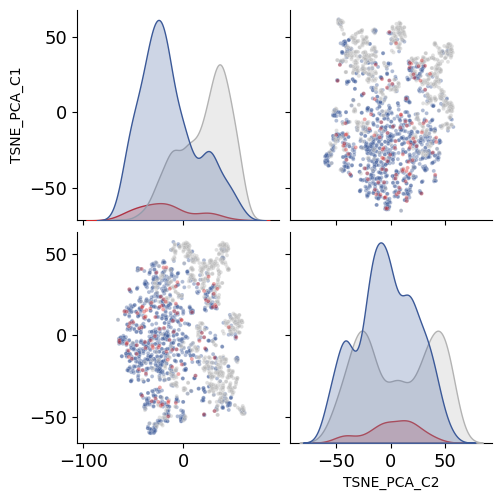

In [ ]:
data_full['FP'] = data_full['ROMol'].map(get_cfps)
X_2 = np.array([x.fp for x in data_full['FP']])


pca_model2 = PCA(n_components=30, random_state=0)
tsne_model2 = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_pca_drugs = tsne_model2.fit_transform(pca_model2.fit_transform(X_2))

data_full['TSNE_PCA_C1'] = tsne_pca_drugs.T[0]
data_full['TSNE_PCA_C2'] = tsne_pca_drugs.T[1]


custom_palette2 = ['#3b5998', '#b3b3b3','#d62728']

plot_kws = {'s': 8}  # s는 점의 크기를 의미합니다. 원하는 크기로 설정하세요.

g2 = sns.pairplot(data_full, hue='Split', vars=['TSNE_PCA_C1', 'TSNE_PCA_C2'], plot_kws=plot_kws, palette=custom_palette2)

for ax in g2.axes.flatten():
    if not ax is None:
        for artist in ax.collections:
            artist.set_alpha(0.4)
            ax.set_xlabel('')
            ax.set_ylabel('')

g2.tick_params(axis='both', which='major', labelsize=13)

# 범례 제거
if g2._legend:
    g2._legend.remove()

plt.savefig('/content/drive/MyDrive/metabolism_figure/structures_0717_train_test_TSNE_PCA.png', dpi=1000, bbox_inches='tight')
plt.show()

[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerator
[07:10:33] DEPRECATION WARNING: please use MorganGenerat

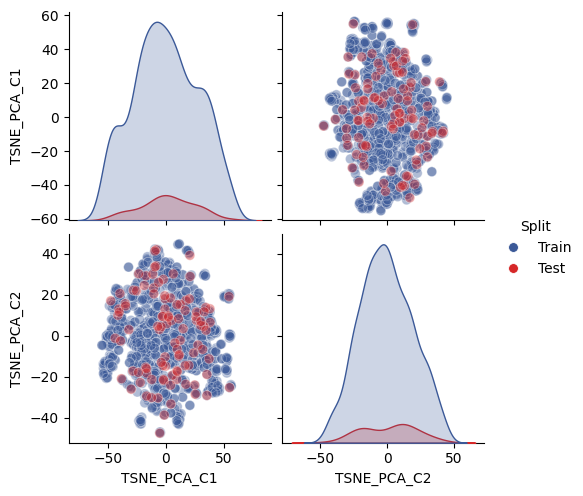

In [ ]:
train_test['FP'] = train_test['ROMol'].map(get_cfps)
X_2 = np.array([x.fp for x in train_test['FP']])


pca_model2 = PCA(n_components=30, random_state=0)
tsne_model2 = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_pca_drugs = tsne_model2.fit_transform(pca_model2.fit_transform(X_2))

train_test['TSNE_PCA_C1'] = tsne_pca_drugs.T[0]
train_test['TSNE_PCA_C2'] = tsne_pca_drugs.T[1]


custom_palette2 = ['#3b5998','#d62728']

plot_kws = {'s': 50}  # s는 점의 크기를 의미합니다. 원하는 크기로 설정하세요.

g2 = sns.pairplot(train_test, hue='Split', vars=['TSNE_PCA_C1', 'TSNE_PCA_C2'], plot_kws=plot_kws, palette=custom_palette2)

for ax in g2.axes.flatten():
    if not ax is None:
        for artist in ax.collections:
            artist.set_alpha(0.4)

plt.savefig('/content/drive/MyDrive/metabolism_figure/structures_0614_train_test_TSNE_PCA.png', dpi=600, bbox_inches='tight')
plt.show()


In [161]:
!pip install cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.3 MB/s eta 0:00:00


In [ ]:
from IPython.display import SVG
import cairosvg
import tempfile

def hsvToRgb(h, s, v):
    c = v * s
    h /= 30.0
    x = c * (1 - abs(h % 2 - 1))
    if 0 <= h < 1:
        r, g, b = (c, x, 0)
    elif 1 <= h < 2:
        r, g, b = (x, c, 0)
    elif 2 <= h < 3:
        r, g, b = (0, c, x)
    elif 3 <= h < 4:
        r, g, b = (0, x, c)
    elif 4 <= h < 5:
        r, g, b = (x, 0, c)
    else:
        r, g, b = (c, 0, x)
    m = v - c
    r, g, b = r + m, g + m, b + m
    # Adjust the color to be closer to white if saturation is low
    if s < 0.08:
        r, g, b = 0.9, 0.9, 0.9
    return (r, g, b)

def SoM_to_image(df, som_dict, dir_path, subtype):
  for i in df.index:
    try:
      database_id = f'TEST' + '0'*(4-len(str(i))) + str(i)
      name = df['ID'][i]
      mol = df['ROMol'][i]
      bond_features = som_dict['bond_som'][subtype][i]['y_prob']
      # print(bond_features)
      atom_features = som_dict['atom_som'][subtype][i]['y_prob']
      print(database_id)
      highlights_bond = {}
      highlights_atom = {}
      highlight_line_width = {}
      highlightRadii = {}
      minY = 0
      maxY = 0.8

      dwg = Draw.MolDraw2DSVG(600, 400)
      opt = dwg.drawOptions()
      # opt.fillHighlights = False
      opt.continuousHighlight = True
      # opt.maxFontSize = 60
      # opt.minFontSize = 30
      opt.baseFontSize = 0.9
      opt.bondLineWidth = 2.6

      # mol = Chem.AddHs(mol, addCoords=True)

      # for idx, atom in enumerate(mol.GetAtoms()):
      #   atom.SetAtomMapNum(idx + 1)

      for idx, bond in enumerate(mol.GetBonds()):
          label = bond_features[idx]
          bond.ClearProp('bondNote')
          # bond.SetProp('bondNote', '%.2f' % label)
          value_threshold = (label - minY) / (maxY - minY)
          if value_threshold < 0:
            value_threshold = 0
          highlights_bond[bond.GetIdx()] = [hsvToRgb(200, value_threshold, 0.8)]
          highlight_line_width[bond.GetIdx()] = int(5*(label - minY) / (maxY - minY))

      for idx, atom in enumerate(mol.GetAtoms()):
          label = atom_features[idx]
          atom.ClearProp('AtomMapNumber')
          atom.ClearProp('atomNote')
          # atom.SetProp('atomNote', '%.2f' % label)
          value_threshold = (label - minY) / (maxY - minY)
          if value_threshold < 0:
            value_threshold = 0
          highlights_atom[atom.GetIdx()] = [hsvToRgb(200, value_threshold, 0.8)]
          highlightRadii[atom.GetIdx()] = 0.4

      AllChem.Compute2DCoords(mol)
      # for atom in mol.GetAtoms():
      #   atom.ClearProp('molAtomMapNumber')
      dwg.DrawMoleculeWithHighlights(mol, '', highlights_atom, highlights_bond, highlightRadii, highlight_line_width)
      # dwg.DrawMoleculeWithHighlights(mol, '', highlights_atom,'', highlightRadii,'')
      # dwg.DrawMoleculeWithHighlights(mol, '', '', highlights_bond, '', highlight_line_width)
      # dwg.DrawMoleculeWithHighlights(mol, '', '', '', '', '')
      dwg.FinishDrawing()
      svg_text = dwg.GetDrawingText()
      SVG(dwg.GetDrawingText().replace('svg:', ''))

      with tempfile.NamedTemporaryFile(delete=True) as tmp:
          tmp.write(svg_text.encode())
          tmp.flush()
          # cairosvg.svg2png(url=tmp.name, write_to=f"{dir_path}/{database_id}_{name}_label.png")
          cairosvg.svg2png(url=tmp.name, write_to=f"{dir_path}/{database_id}_{name}_{subtype}_label.png")
    except Exception as e:
      print(e)

In [120]:
import json
import os
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from pathlib import Path
from PIL import Image, ImageDraw, ImageFont

def load_sdf_file(file_path):
    sanitized_mols = []
    suppl = Chem.SDMolSupplier(file_path)
    for x in suppl:
        if x is not None:
            try:
                x_with_h = Chem.AddHs(x, addCoords=True)
                Chem.SanitizeMol(x_with_h)
                for idx, atom in enumerate(x_with_h.GetAtoms()):
                  atom.SetAtomMapNum(idx + 1)
                sanitized_mols.append(x_with_h)
            except:
                sanitized_mols.append('')

    df = PandasTools.LoadSDF(file_path)
    df['Molecules'] = sanitized_mols
    return df

reaction_rules = pd.read_csv("/content/drive/MyDrive/metabolite_generator/gloryx_reactionrules_type_0723.csv", encoding='cp949')

# with open('/content/drive/MyDrive/metabolism_figure/metabolite_24/mean_data_0723_24FDA.json', 'r') as file:
#     SoM_dict = json.load(file)
# mol_df = load_sdf_file('/content/drive/MyDrive/metabolism_figure/metabolite_24/2024_FDA_approval.sdf')

In [121]:
with open('/content/drive/MyDrive/SoM_Dataset/mean_data_0719.json', 'r') as file:
    SoM_dict = json.load(file)
mol_df = load_sdf_file('/content/drive/MyDrive/SoM_Dataset/test_0712.sdf')

In [125]:
ex_mol_df = mol_df[62:63]

In [126]:
ex_mol_df

,InChIKey,PubChem_CID,BOM_1A2,BOM_2A6,BOM_2B6,BOM_2C8,BOM_2C9,BOM_2C19,BOM_2D6,BOM_2E1,BOM_3A4,References,FLAG_COMMENTS,ID,smile,ROMol,Molecules
62,GHKOONMJXNWOIW-UHFFFAOYSA-N,118861389,"<37,4;Dealkylation;R2><37,H;Dealkylation;R2>\n...","<37,4;Dealkylation;R2><37,H;Dealkylation;R2>\n...","<37,4;Dealkylation;R2><37,H;Dealkylation;R2>\n...","<32,8;Dealkylation;R1><32,H;Dealkylation;R1>/<...","<32,8;Dealkylation;R1><32,H;Dealkylation;R1>/<...","<32,8;Dealkylation;R1><32,H;Dealkylation;R1>/<...","<25,6;Dealkylation;R3><25,H;Dealkylation;R3>\n...","<32,8;Dealkylation;R1><32,H;Dealkylation;R1>/<...","<32,8;Dealkylation;R1><32,H;Dealkylation;R1>/<...","Liu, Xiao-yun, et al. ""Alflutinib (AST2818), p...",,Alflutinib,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,<rdkit.Chem.rdchem.Mol object at 0x7ac63a93b1b0>,<rdkit.Chem.rdchem.Mol object at 0x7ac63f3ef7d0>


In [122]:
def BoM_to_image(df, fda_reaction_dict, dir_path, subtype):
    for i in df.index:
        try:
            database_id = f'TEST' + '0'*(4-len(str(i))) + str(i)
            name = df['ID'][i]
            mol = df['ROMol'][i]
            bond_features = fda_reaction_dict['oxc'][subtype][i]['y_prob']

            print(database_id)

            highlights_bond = {}
            highlights_atom = {}
            highlight_line_width = {}
            highlightRadii = {}
            atom_max_value = {}

            minY = 0
            maxY = 1

            dwg = Draw.MolDraw2DSVG(600, 400)
            opt = dwg.drawOptions()
            opt.continuousHighlight = True
            opt.baseFontSize = 0.7
            opt.bondLineWidth = 2.6

            # mol = Chem.AddHs(mol, addCoords=True)

            # Track the maximum value for each atom
            for idx, bond in enumerate(mol.GetBonds()):
                label = bond_features[idx]
                value_threshold = (label - minY) / (maxY - minY)
                if value_threshold < 0:
                    value_threshold = 0
                color = hsvToRgb(200, value_threshold, 0.8)

                atom1 = bond.GetBeginAtomIdx()
                atom2 = bond.GetEndAtomIdx()

                # Update maximum value for each atom
                if atom1 not in atom_max_value or atom_max_value[atom1] < value_threshold:
                    atom_max_value[atom1] = value_threshold
                if atom2 not in atom_max_value or atom_max_value[atom2] < value_threshold:
                    atom_max_value[atom2] = value_threshold

                highlights_bond[bond.GetIdx()] = [color]
                highlight_line_width[bond.GetIdx()] = int(5 * (label - minY) / (maxY - minY))

            # Apply colors to atoms based on the highest bond feature value
            for atom_idx, max_value in atom_max_value.items():
                color = hsvToRgb(200, max_value, 0.8)
                highlights_atom[atom_idx] = [color]
                highlightRadii[atom_idx] = 0.4

            AllChem.Compute2DCoords(mol)
            dwg.DrawMoleculeWithHighlights(mol, '', highlights_atom, highlights_bond, highlightRadii, highlight_line_width)
            dwg.FinishDrawing()
            svg_text = dwg.GetDrawingText()
            SVG(dwg.GetDrawingText().replace('svg:', ''))

            with tempfile.NamedTemporaryFile(delete=True) as tmp:
                tmp.write(svg_text.encode())
                tmp.flush()
                cairosvg.svg2png(url=tmp.name, write_to=f"{dir_path}/{database_id}_{name}_{subtype}_cleavage.png")
        except Exception as e:
            print(e)


In [ ]:
type_list = ['BOM_1A2', 'BOM_2A6', 'BOM_2B6', 'BOM_2C8', 'BOM_2C9', 'BOM_2C19', 'BOM_2D6', 'BOM_2E1', 'BOM_3A4', 'CYP_REACTION']

for subtype in type_list:
  SoM_to_image(ex_mol_df, SoM_dict, '/content/drive/MyDrive/metabolism_figure/Alflutinib', subtype)

TEST0052
TEST0052
TEST0052
TEST0052
TEST0052
TEST0052
TEST0052
TEST0052
TEST0052
TEST0052


In [ ]:
type_list = ['BOM_1A2', 'BOM_2A6', 'BOM_2B6', 'BOM_2C8', 'BOM_2C9', 'BOM_2C19', 'BOM_2D6', 'BOM_2E1', 'BOM_3A4', 'CYP_REACTION']

for subtype in type_list:
  BoM_to_image(ex_mol_df, SoM_dict, '/content/drive/MyDrive/metabolism_figure/Alflutinib', subtype)

TEST0062
TEST0062
TEST0062
TEST0062
TEST0062
TEST0062
TEST0062
TEST0062
TEST0062
TEST0062


In [150]:
template = ex_mol_df['ROMol'][62]
AllChem.Compute2DCoords(template)

0

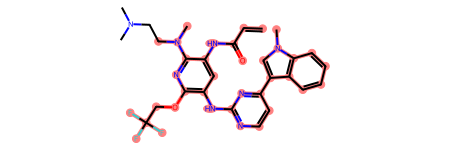

In [172]:
template

In [179]:
from rdkit import Chem, Geometry
from rdkit.Chem import AllChem, Draw, rdMolAlign
from pathlib import Path
import os
import tempfile
import cairosvg
from IPython.display import SVG

# 디렉토리 경로 설정
sdf_dir = '/content/drive/MyDrive/metabolism_figure/Alflutinib/Alflutinib_metabolite'
output_dir = '/content/drive/MyDrive/metabolism_figure/Alflutinib/Alflutinib_metabolite/output'
Path(output_dir).mkdir(parents=True, exist_ok=True)

# SDF 파일 목록 가져오기
sdf_files = [f for f in os.listdir(sdf_dir) if f.endswith('.sdf')]

# 템플릿 분자 설정
template = ex_mol_df['ROMol'][62]
AllChem.Compute2DCoords(template)

def clean_svg(svg_text):
    # Remove any BOM (Byte Order Mark) and extra whitespace
    svg_text = svg_text.strip()  # Remove leading/trailing whitespace
    if svg_text.startswith('\ufeff'):
        svg_text = svg_text[1:]  # Remove BOM if present
    return svg_text

def process_molecule(sdf_file, ref_mol, output_dir):
    sdf_path = os.path.join(sdf_dir, sdf_file)
    suppl = Chem.SDMolSupplier(sdf_path)
    base_name = os.path.splitext(sdf_file)[0]

    # Convert SDMolSupplier to a list
    molecules = [mol for mol in suppl if mol is not None]

    for i, probe_mol in enumerate(molecules):

        for atom in probe_mol.GetAtoms():
            atom.ClearProp('molAtomMapNumber')
        mols = [ref_mol, probe_mol]

        score = probe_mol.GetProp('Score') if probe_mol.HasProp('Score') else 'N/A'
        score = str(round(float(score), 4))
        reaction = probe_mol.GetProp('Reaction') if probe_mol.HasProp('Reaction') else 'N/A'

        # MCS를 이용해 공통 부분을 찾고 좌표 재계산
        mcs = rdFMCS.FindMCS(mols, threshold=0.8, completeRingsOnly=True, ringMatchesRingOnly=True)
        patt = Chem.MolFromSmarts(mcs.smartsString)
        refMatch = ref_mol.GetSubstructMatch(patt)
        probeMatch = probe_mol.GetSubstructMatch(patt)

        if len(refMatch) == len(probeMatch):
            coord_dict = {probeMatch[j]: Geometry.Point2D(ref_mol.GetConformer().GetAtomPosition(refMatch[j]).x, ref_mol.GetConformer().GetAtomPosition(refMatch[j]).y) for j in range(len(refMatch))}
            AllChem.Compute2DCoords(probe_mol, coordMap=coord_dict)
        else:
            AllChem.Compute2DCoords(probe_mol)

        rms = AllChem.AlignMol(probe_mol, ref_mol, atomMap=list(zip(probeMatch, refMatch)))

        drawer_probe = Draw.MolDraw2DSVG(600, 400)

        opt = drawer_probe.drawOptions()
        opt.baseFontSize = 0.7
        opt.bondLineWidth = 2.6
        opt.fixedBondLength = 30

        drawer_probe.DrawMolecule(probe_mol)
        drawer_probe.FinishDrawing()
        svg_text = drawer_probe.GetDrawingText()
        SVG(drawer_probe.GetDrawingText().replace('svg:', ''))

        with tempfile.NamedTemporaryFile(delete=True) as tmp:
            tmp.write(svg_text.encode())
            tmp.flush()
            cairosvg.svg2png(url=tmp.name, write_to=f"{output_dir}/{base_name}_{i}_{score}_{reaction}.png")

# Process each SDF file
for sdf_file in sdf_files:
    process_molecule(sdf_file, template, output_dir)

print("모든 SDF 파일 처리가 완료되었습니다.")



모든 SDF 파일 처리가 완료되었습니다.


In [174]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdMolAlign
from pathlib import Path
from rdkit.Chem import rdFMCS
import os
import tempfile
import cairosvg
from IPython.display import SVG

# 디렉토리 경로 설정
sdf_dir = '/content/drive/MyDrive/metabolism_figure/Alflutinib/Alflutinib_metabolite'
output_dir = '/content/drive/MyDrive/metabolism_figure/Alflutinib/Alflutinib_metabolite/output2'
Path(output_dir).mkdir(parents=True, exist_ok=True)

# SDF 파일 목록 가져오기
sdf_files = [f for f in os.listdir(sdf_dir) if f.endswith('.sdf')]

template = ex_mol_df['ROMol'][62]
AllChem.Compute2DCoords(template)

def align_molecules(probe_mol, ref_mol):
    try:
        # Compute the best alignment transform
        rms, transform, atom_map = rdMolAlign.GetBestAlignmentTransform(
            probe_mol, ref_mol,
            prbCid=-1,
            refCid=-1,
            map=[],
            maxMatches=1000000,
            symmetrizeConjugatedTerminalGroups=True,
            weights=[],
            reflect=False,
            maxIters=50,
            numThreads=1
        )
        return rms, transform, atom_map
    except Exception as e:
        print(f"Error in alignment: {e}")
        return None, None, None

def clean_svg(svg_text):
    # Remove any BOM (Byte Order Mark) and extra whitespace
    svg_text = svg_text.strip()  # Remove leading/trailing whitespace
    if svg_text.startswith('\ufeff'):
        svg_text = svg_text[1:]  # Remove BOM if present
    return svg_text

def process_molecule(sdf_file, ref_mol, output_dir):
    sdf_path = os.path.join(sdf_dir, sdf_file)
    suppl = Chem.SDMolSupplier(sdf_path)
    base_name = os.path.splitext(sdf_file)[0]

    # Convert SDMolSupplier to a list
    molecules = [mol for mol in suppl if mol is not None]

    for i, probe_mol in enumerate(molecules[1:], start=1):

        for atom in probe_mol.GetAtoms():
            atom.ClearProp('molAtomMapNumber')
        mols = [ref_mol, probe_mol]

        score = probe_mol.GetProp('Score') if probe_mol.HasProp('Score') else 'N/A'
        score = str(round(float(score), 4))
        reaction = probe_mol.GetProp('Reaction') if probe_mol.HasProp('Reaction') else 'N/A'
        AllChem.Compute2DCoords(probe_mol)
        mcs = rdFMCS.FindMCS(mols, threshold=0.8, completeRingsOnly=True, ringMatchesRingOnly=True)

        patt = Chem.MolFromSmarts(mcs.smartsString)
        refMatch = ref_mol.GetSubstructMatch(patt)
        mv = probe_mol.GetSubstructMatch(patt)
        rms = AllChem.AlignMol(probe_mol, ref_mol, atomMap=list(zip(mv, refMatch)))

        drawer_probe = Draw.MolDraw2DSVG(600, 400)

        opt = drawer_probe.drawOptions()
        opt.baseFontSize = 0.7
        opt.bondLineWidth = 2.6
        opt.fixedBondLength = 30

        drawer_probe.DrawMolecule(probe_mol)
        drawer_probe.FinishDrawing()
        svg_text = drawer_probe.GetDrawingText()
        SVG(drawer_probe.GetDrawingText().replace('svg:', ''))

        with tempfile.NamedTemporaryFile(delete=True) as tmp:
          tmp.write(svg_text.encode())
          tmp.flush()
          cairosvg.svg2png(url=tmp.name, write_to=f"{output_dir}/{base_name}_{i+1}_{score}_{reaction}.png")

# Process each SDF file
for sdf_file in sdf_files:
    process_molecule(sdf_file, template, output_dir)

print("모든 SDF 파일 처리가 완료되었습니다.")


모든 SDF 파일 처리가 완료되었습니다.


In [142]:
import os
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from pathlib import Path
from PIL import Image, ImageDraw, ImageFont

# SDF 파일들이 있는 디렉토리 경로
sdf_dir = '/content/drive/MyDrive/metabolism_figure/Alflutinib/Alflutinib_metabolite'
# PNG 파일들을 저장할 디렉토리 경로
output_dir = '/content/drive/MyDrive/metabolism_figure/Alflutinib/Alflutinib_metabolite/output'

# 디렉토리가 존재하지 않으면 생성
Path(output_dir).mkdir(parents=True, exist_ok=True)

# SDF 파일 목록 가져오기
sdf_files = [f for f in os.listdir(sdf_dir) if f.endswith('.sdf')]

# 각 SDF 파일 처리
for sdf_file in sdf_files:
    sdf_path = os.path.join(sdf_dir, sdf_file)
    suppl = Chem.SDMolSupplier(sdf_path)

    # 분자들을 순서대로 처리
    for i, mol in enumerate(suppl):
        if mol is not None:
            # 분자 구조를 2D로 그리기
            for atom in mol.GetAtoms():
                atom.ClearProp('molAtomMapNumber')
            mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
            try:
              AllChem.GenerateDepictionMatching2DStructure(mol,template)
              draw_options = Draw.MolDrawOptions()
              draw_options.baseFontSize = 0.8
              draw_options.bondLineWidth = 2.6

              img = Draw.MolToImage(mol, size=(600, 400))

              # 이미지에 텍스트 추가
              score = mol.GetProp('Score') if mol.HasProp('Score') else 'N/A'
              score = str(round(float(score), 4))
              reaction = mol.GetProp('Reaction') if mol.HasProp('Reaction') else 'N/A'
              img = img.convert("RGBA")

              # Create a new image with extra space for text
              new_img = Image.new("RGBA", (600, 400), (255, 255, 255, 255))
              new_img.paste(img, (0, 0))

              # Draw text on the image
              draw = ImageDraw.Draw(new_img)

              # font = ImageFont.load_default()

              # draw.text((10, 510), f"Score: {score}", fill=(0, 0, 0), font=font)
              # draw.text((10, 530), f"Reaction: {reaction}", fill=(0, 0, 0), font=font)

              # PNG 파일 이름 생성
              base_name = os.path.splitext(sdf_file)[0]
              png_file = f"{base_name}_{i+1}_{score}_{reaction}.png"
              png_path = os.path.join(output_dir, png_file)

              # PNG 파일로 저장
              new_img.save(png_path)
            except Exception as e:
              print(e)
              pass

print("모든 SDF 파일 처리가 완료되었습니다.")

Depict error: Substructure match with reference not found.
Depict error: Substructure match with reference not found.
Depict error: Substructure match with reference not found.
Depict error: Substructure match with reference not found.
Depict error: Substructure match with reference not found.
Depict error: Substructure match with reference not found.
Depict error: Substructure match with reference not found.
Depict error: Substructure match with reference not found.
Depict error: Substructure match with reference not found.
Depict error: Substructure match with reference not found.
Depict error: Substructure match with reference not found.
Depict error: Substructure match with reference not found.
Depict error: Substructure match with reference not found.
Depict error: Substructure match with reference not found.
could not convert string to float: 'N/A'
could not convert string to float: 'N/A'
Depict error: Substructure match with reference not found.
could not convert string to float

In [111]:
df = pd.read_csv('/content/drive/MyDrive/metabolism_figure/performance_metabolite/0730_Nontopk_cypall_subthr0.2.csv')

In [112]:
true = pd.read_csv('/content/drive/MyDrive/SoM_Dataset/0723_test_metabolites_true.csv')

In [113]:
df

,model,top_k,sum_tuple,all_metabolites,identified_metabolites,total_pred_metabolites,precision,recall,f1,jaccard_index,subs_accuracy,subs_precision,subs_recall,at_least_one,at_least_half
0,CYP_REACTION_thr0.05,eval2,"(166, 57, 223, 741)",64.71,166,741,0.22,0.74,0.34,0.21,0.93,0.93,1.00,NaN,NaN
1,max_thr0.05,eval2,"(170, 53, 223, 822)",67.65,170,822,0.21,0.76,0.33,0.19,0.92,0.92,1.00,NaN,NaN
2,CYP_REACTION_thr0.2,eval2,"(120, 103, 223, 309)",45.10,120,309,0.39,0.54,0.45,0.29,0.88,0.94,0.92,NaN,NaN
3,max_thr0.2,eval2,"(130, 93, 223, 353)",50.00,130,353,0.37,0.58,0.45,0.29,0.89,0.93,0.94,NaN,NaN
4,Cyproduct_output_0718_thr0,eval2,"(120, 103, 223, 384)",50.00,120,384,0.31,0.54,0.40,0.25,NaN,NaN,NaN,75.49,72.55
5,output_0730_cm1_thr0,eval2,"(52, 123, 175, 745)",37.18,52,745,0.07,0.30,0.11,0.06,NaN,NaN,NaN,34.62,47.44
6,output_0730_cm2_thr0,eval2,"(33, 142, 175, 251)",29.49,33,251,0.13,0.19,0.15,0.08,NaN,NaN,NaN,28.21,37.18
7,output_0730_cm3_thr0,eval2,"(57, 118, 175, 868)",41.03,57,868,0.07,0.33,0.11,0.06,NaN,NaN,NaN,34.62,48.72
8,transformer_1_output_0718_thr0,eval2,"(159, 64, 223, 1330)",60.78,159,1330,0.12,0.71,0.20,0.11,NaN,NaN,NaN,74.51,80.39


In [114]:
for i in range(len(df)):
  df['model'][i] = df['model'][i].replace('CYP_REACTION_thr','all_')
  df['model'][i] = df['model'][i].replace('max_thr','max_')
  df['model'][i] = df['model'][i].replace('Cyproduct_output_0718_thr0','CyProdcut')
  df['model'][i] = df['model'][i].replace('transformer_1_output_0718_thr0','BT_1')
  df['model'][i] = df['model'][i].replace('output_0730','BT_3')
  df['model'][i] = df['model'][i].replace('_thr0','')
  df['model'][i] = df['model'][i].replace('cm','m')

<ipython-input-114-2612cc9cd9f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'][i] = df['model'][i].replace('CYP_REACTION_thr','all_')
<ipython-input-114-2612cc9cd9f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'][i] = df['model'][i].replace('max_thr','max_')
<ipython-input-114-2612cc9cd9f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'][i] = df['model'][i].replace('Cyproduct_output_0718_thr0'

In [115]:
df

,model,top_k,sum_tuple,all_metabolites,identified_metabolites,total_pred_metabolites,precision,recall,f1,jaccard_index,subs_accuracy,subs_precision,subs_recall,at_least_one,at_least_half
0,all_0.05,eval2,"(166, 57, 223, 741)",64.71,166,741,0.22,0.74,0.34,0.21,0.93,0.93,1.00,NaN,NaN
1,max_0.05,eval2,"(170, 53, 223, 822)",67.65,170,822,0.21,0.76,0.33,0.19,0.92,0.92,1.00,NaN,NaN
2,all_0.2,eval2,"(120, 103, 223, 309)",45.10,120,309,0.39,0.54,0.45,0.29,0.88,0.94,0.92,NaN,NaN
3,max_0.2,eval2,"(130, 93, 223, 353)",50.00,130,353,0.37,0.58,0.45,0.29,0.89,0.93,0.94,NaN,NaN
4,CyProdcut,eval2,"(120, 103, 223, 384)",50.00,120,384,0.31,0.54,0.40,0.25,NaN,NaN,NaN,75.49,72.55
5,BT_3_m1,eval2,"(52, 123, 175, 745)",37.18,52,745,0.07,0.30,0.11,0.06,NaN,NaN,NaN,34.62,47.44
6,BT_3_m2,eval2,"(33, 142, 175, 251)",29.49,33,251,0.13,0.19,0.15,0.08,NaN,NaN,NaN,28.21,37.18
7,BT_3_m3,eval2,"(57, 118, 175, 868)",41.03,57,868,0.07,0.33,0.11,0.06,NaN,NaN,NaN,34.62,48.72
8,BT_1,eval2,"(159, 64, 223, 1330)",60.78,159,1330,0.12,0.71,0.20,0.11,NaN,NaN,NaN,74.51,80.39


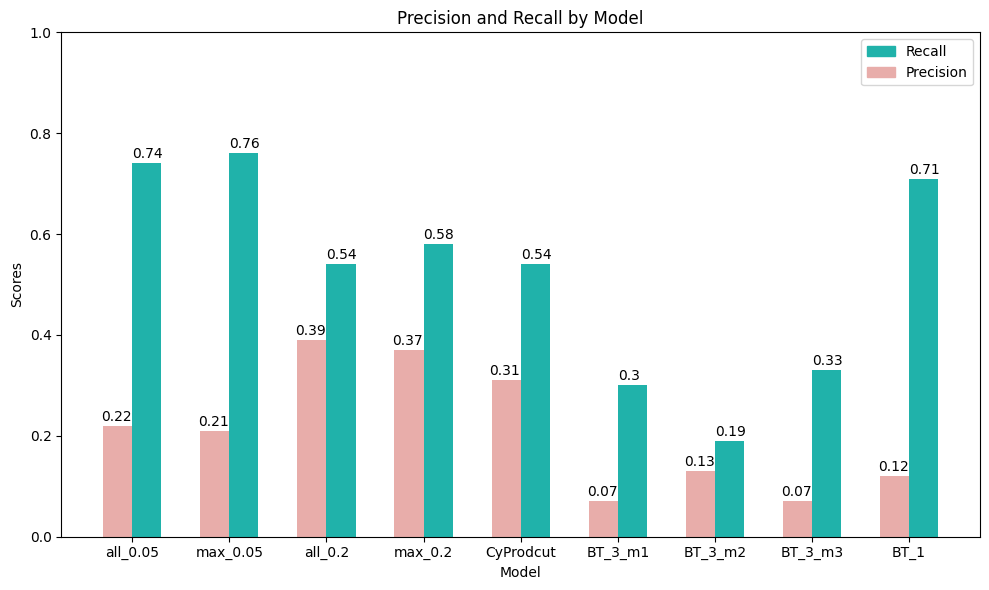

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# 컬러 코드 리스트 (예시)
color_codes = ['#20B2AA', '#20B2AA', '#20B2AA', '#20B2AA', '#20B2AA', '#20B2AA','#20B2AA', '#20B2AA', '#20B2AA', '#20B2AA', '#20B2AA','#20B2AA', '#20B2AA']
color_map = {model: color for model, color in zip(df['model'], color_codes)}

# 컬러 코드 리스트 (예시)
color_codes2 = ['#E8ADAA', '#E8ADAA', '#E8ADAA', '#E8ADAA', '#E8ADAA', '#E8ADAA', '#E8ADAA', '#E8ADAA', '#E8ADAA', '#E8ADAA', '#E8ADAA','#E8ADAA', '#E8ADAA']
color_map2 = {model: color for model, color in zip(df['model'], color_codes2)}

n_models = len(df['model'])

# 막대 위치 조정
indices = np.arange(n_models)
width = 0.3

fig, ax1 = plt.subplots(figsize=(10, 6))

# 그래프 1: Precision과 Recall
ax1.bar(indices - width/2, df['precision'], color=[color_map2[model] for model in df['model']], width=width, align='center')
ax1.bar(indices + width/2, df['recall'], color=[color_map[model] for model in df['model']], width=width, align='center')
ax1.set_title('Precision and Recall by Model')
ax1.set_xlabel('Model')
ax1.set_ylabel('Scores')
ax1.set_xticks(indices)
ax1.set_xticklabels(df['model'])
ax1.set_ylim([0, 1])

our_recall_patch = mpatches.Patch(color='#20B2AA', label='Recall')
our_precison_patch = mpatches.Patch(color='#E8ADAA', label='Precision')

ax1.legend(handles=[our_recall_patch, our_precison_patch], loc='upper right', bbox_to_anchor=(1, 1))
# ax1.legend(handles=[our_recall_patch, our_precison_patch], loc='center left', bbox_to_anchor=(1.04, 0.5))

for i, v in enumerate(df['precision']):
    ax1.text(i - 0.32, v + 0.01, str(v), color='black')
for i, v in enumerate(df['recall']):
    ax1.text(i, v + 0.01, str(v), color='black')

# 레이아웃 조정
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/metabolism_figure/precision and recall.png', dpi=1000, bbox_inches='tight')
plt.show()

In [87]:
df = pd.read_csv('/content/drive/MyDrive/metabolism_figure/performance_metabolite/0730_cyp_all.csv').dropna()

In [88]:
df

,model,top_k,sum_tuple,all_metabolites,identified_metabolites,total_pred_metabolites,precision,recall,f1,jaccard_index,subs_accuracy,subs_precision,subs_recall
0,BOM_1A2_thr0.15,99.0,"(33, 19, 52, 55)",46.43,33.0,55,0.60,0.63,0.62,0.45,0.56,0.38,0.93
1,1A2_thr0,99.0,"(24, 28, 52, 37)",32.14,24.0,37,0.65,0.46,0.54,0.37,0.68,0.45,0.86
2,BOM_2A6_thr0.05,99.0,"(8, 11, 19, 20)",42.86,8.0,20,0.40,0.42,0.41,0.26,0.67,0.22,0.57
3,2A6_thr0,99.0,"(5, 14, 19, 7)",28.57,5.0,7,0.71,0.26,0.38,0.24,0.81,0.31,0.29
4,BOM_2B6_thr0.05,99.0,"(22, 11, 33, 40)",44.44,22.0,40,0.55,0.67,0.60,0.43,0.33,0.20,0.94
5,2B6_thr0,99.0,"(8, 25, 33, 15)",16.67,8.0,15,0.53,0.24,0.33,0.20,0.71,0.30,0.50
6,BOM_2C8_thr0.1,99.0,"(30, 15, 45, 54)",57.69,30.0,54,0.56,0.67,0.61,0.43,0.45,0.31,0.96
7,2C8_thr0,99.0,"(16, 29, 45, 28)",23.08,16.0,28,0.57,0.36,0.44,0.28,0.58,0.33,0.65
8,BOM_2C9_thr0.15,99.0,"(33, 24, 57, 61)",53.33,33.0,61,0.54,0.58,0.56,0.39,0.57,0.40,0.90
9,2C9_thr0,99.0,"(28, 29, 57, 54)",46.67,28.0,54,0.52,0.49,0.50,0.34,0.58,0.40,0.90


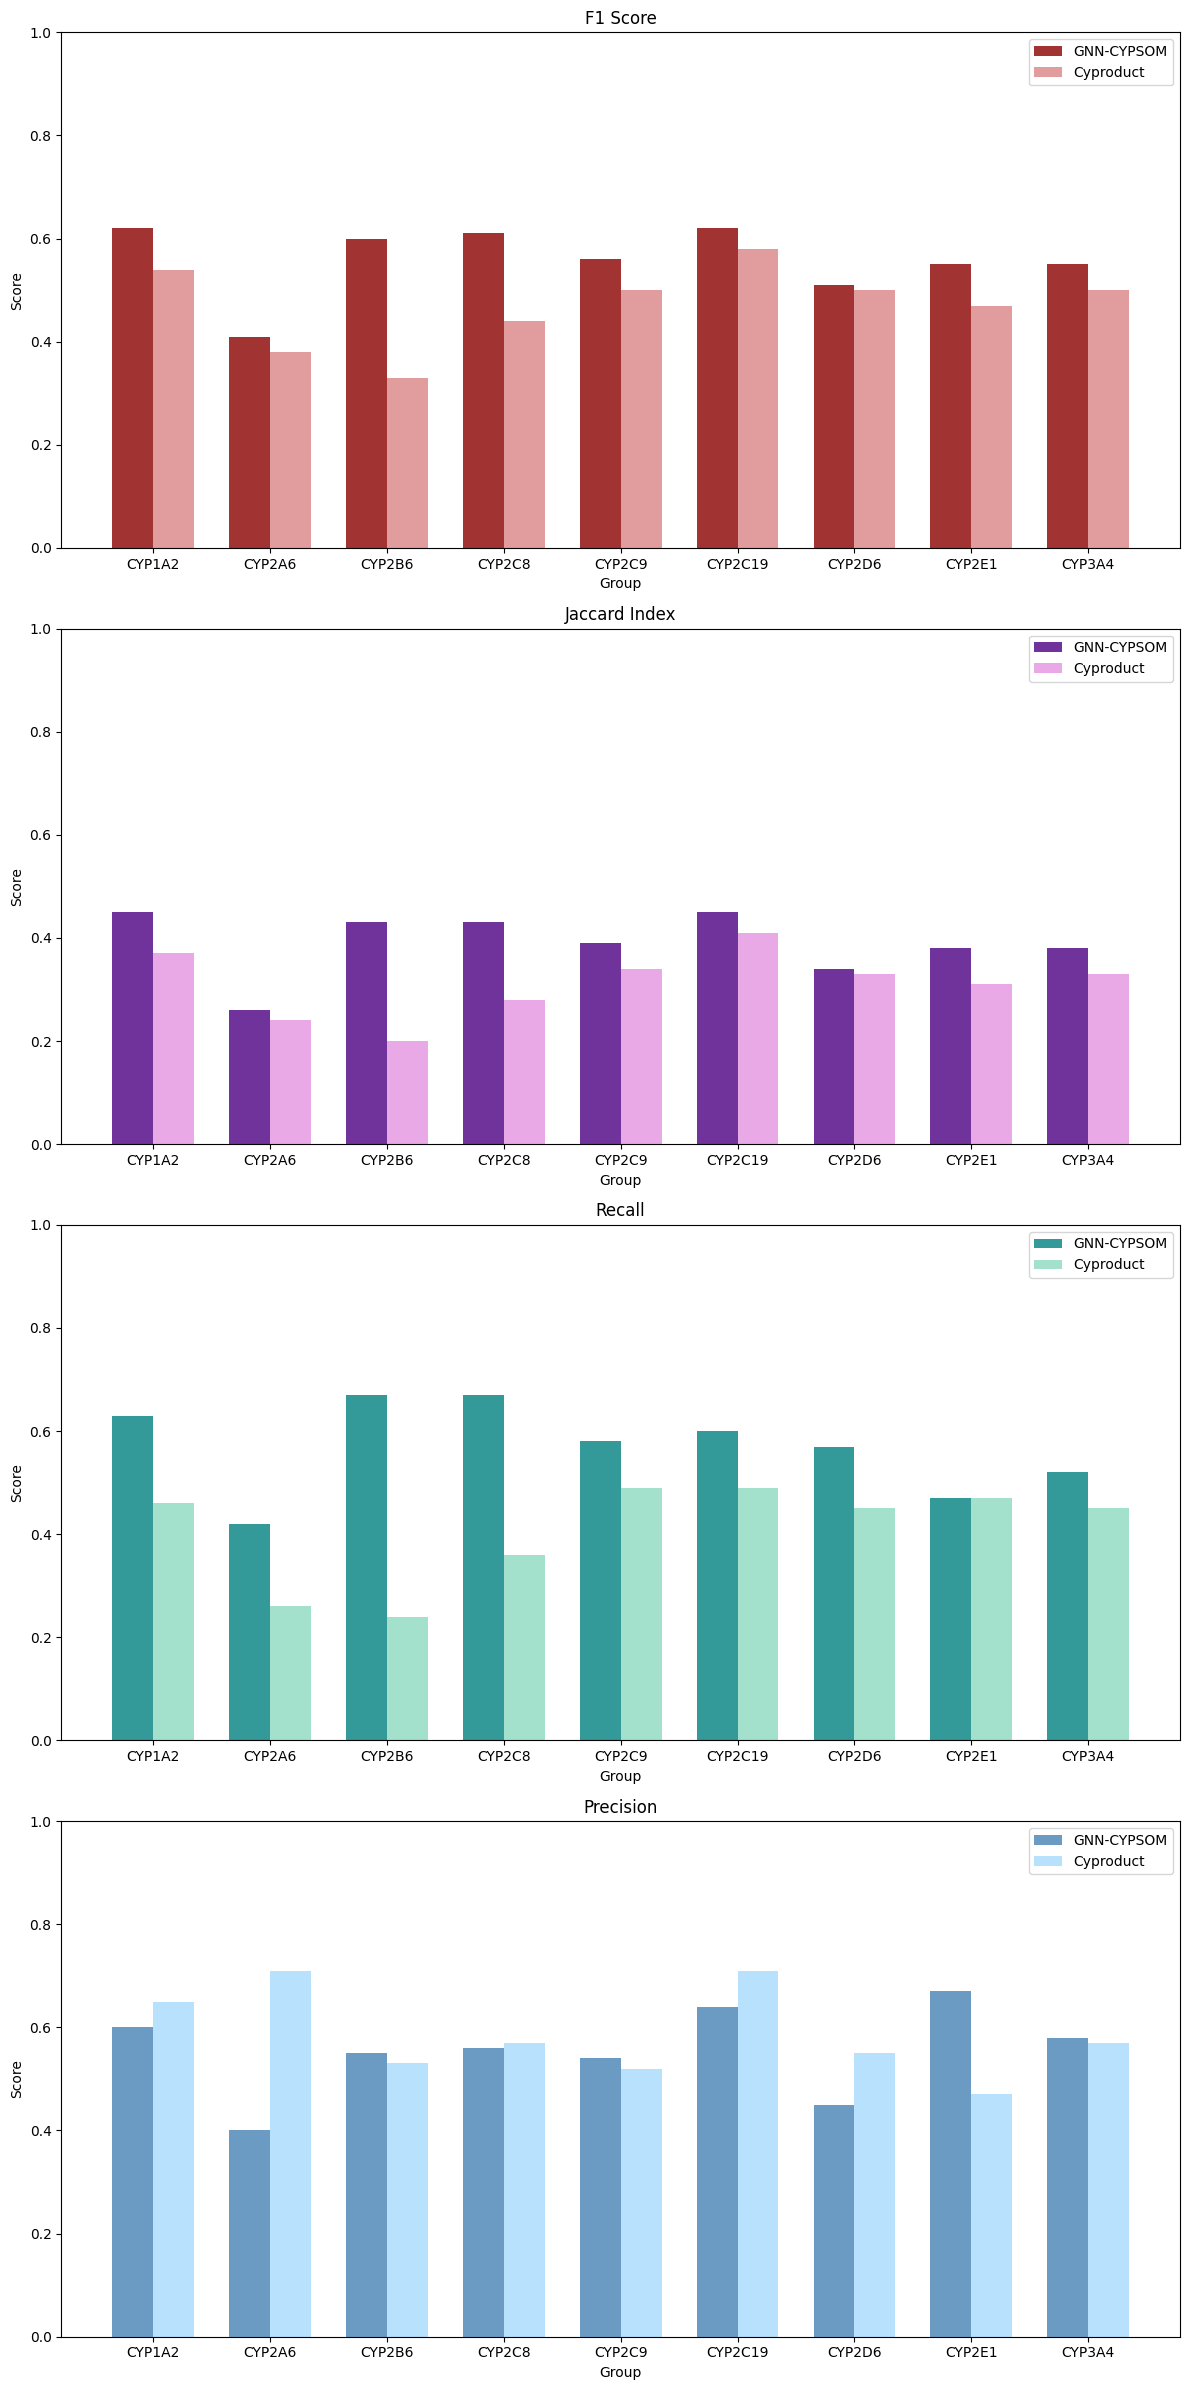

In [91]:
# 주어진 그룹 이름
group_labels = ['CYP1A2', 'CYP2A6', 'CYP2B6', 'CYP2C8', 'CYP2C9', 'CYP2C19', 'CYP2D6', 'CYP2E1', 'CYP3A4']

# 각 그룹을 기준으로 0, 1, ..., 8 위치를 기준으로 삼음
index = np.arange(len(group_labels))
bar_width = 0.35

# Figure와 Subplots 생성 (4x1 형태)
fig, axes = plt.subplots(4, 1, figsize=(12, 24))

# F1 Score 그래프
axes[0].bar(index, df['f1'][::2], bar_width, alpha=0.8, color='#8B0000', label='GNN-CYPSOM')
axes[0].bar(index + bar_width, df['f1'][1::2], bar_width, alpha=0.6, color='#CD5C5C', label='Cyproduct')
axes[0].set_title('F1 Score')
axes[0].set_xticks(index + bar_width / 2)
axes[0].set_xticklabels(group_labels)
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Score')
axes[0].set_ylim(0, 1)
axes[0].legend()

# Jaccard Index 그래프
axes[1].bar(index, df['jaccard_index'][::2], bar_width, alpha=0.8, color='#4B0082', label='GNN-CYPSOM')
axes[1].bar(index + bar_width, df['jaccard_index'][1::2], bar_width, alpha=0.6, color='#DA70D6', label='Cyproduct')
axes[1].set_title('Jaccard Index')
axes[1].set_xticks(index + bar_width / 2)
axes[1].set_xticklabels(group_labels)
axes[1].set_xlabel('Group')
axes[1].set_ylabel('Score')
axes[1].set_ylim(0, 1)
axes[1].legend()

# Recall 그래프
axes[2].bar(index, df['recall'][::2], bar_width, alpha=0.8, color='#008080', label='GNN-CYPSOM')
axes[2].bar(index + bar_width, df['recall'][1::2], bar_width, alpha=0.6, color='#66CDAA', label='Cyproduct')
axes[2].set_title('Recall')
axes[2].set_xticks(index + bar_width / 2)
axes[2].set_xticklabels(group_labels)
axes[2].set_xlabel('Group')
axes[2].set_ylabel('Score')
axes[2].set_ylim(0, 1)
axes[2].legend()

# Precision 그래프
axes[3].bar(index, df['precision'][::2], bar_width, alpha=0.8, color='#4682B4', label='GNN-CYPSOM')
axes[3].bar(index + bar_width, df['precision'][1::2], bar_width, alpha=0.6, color='#87CEFA', label='Cyproduct')
axes[3].set_title('Precision')
axes[3].set_xticks(index + bar_width / 2)
axes[3].set_xticklabels(group_labels)
axes[3].set_xlabel('Group')
axes[3].set_ylabel('Score')
axes[3].set_ylim(0, 1)
axes[3].legend()

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장
plt.savefig('/content/drive/MyDrive/metabolism_figure/cyps_metabolite_0.1_combined.png', dpi=1000, bbox_inches='tight')
plt.show()

In [94]:
true

,Unnamed: 0,Index,Name,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11
0,0,TEST0000,Deferiprone,Cc1[nH]ccc(=O)c1O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,TEST0001,Metaxalone,Cc1cc(CO)cc(OCC2CNC(=O)O2)c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,TEST0002,Omadacycline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,TEST0003,Gliclazide,Cc1ccc(S(=O)(=O)NC(=O)NN2CC3CC(O)CC3C2)cc1,Cc1ccc(S(=O)(=O)NC(=O)NN2CC3CCC(O)C3C2)cc1,O=C(NN1CC2CCCC2C1)NS(=O)(=O)c1ccc(CO)cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,TEST0004,Tasimelteon,CCC(=O)NCC1CC1c1cccc2c1CC(O)O2,CCC(=O)NCC1CC1c1cccc2c1C(O)CO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,TEST0097,Ritonavir,CC(C)c1nc(CNC(=O)NC(C(=O)NC(Cc2ccccc2)CC(O)C(C...,CC(C)c1nc(CN(C)C(=O)NC(C(=O)NC(Cc2ccccc2)CC(O)...,CC(C)C(NC(=O)N(C)Cc1csc(C(C)(C)O)n1)C(=O)NC(Cc...,CNC(=O)NC(C(=O)NC(Cc1ccccc1)CC(O)C(Cc1ccccc1)N...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,98,TEST0098,Vinyl_chloride,ClC1CO1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,99,TEST0099,Vinyl_carbamate,NC(=O)OC1CO1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,100,TEST0100,1_2-dichloroethane,O=CCCl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# 'R'로 시작하는 컬럼들 추출
r_columns = [col for col in true.columns if col.startswith('R')]

# 'R'로 시작하는 컬럼들 중 값이 있는 경우를 row마다 파악하여 'Metabolite_count' 컬럼 생성
true['Metabolite_count'] = true[r_columns].notna().sum(axis=1)
true_

     Unnamed: 0     Index                Name  \
0             0  TEST0000         Deferiprone   
1             1  TEST0001          Metaxalone   
2             2  TEST0002        Omadacycline   
3             3  TEST0003          Gliclazide   
4             4  TEST0004         Tasimelteon   
..          ...       ...                 ...   
97           97  TEST0097           Ritonavir   
98           98  TEST0098      Vinyl_chloride   
99           99  TEST0099     Vinyl_carbamate   
100         100  TEST0100  1_2-dichloroethane   
101         101  TEST0101       Diethyl_ether   

                                                    R1  \
0                                    Cc1[nH]ccc(=O)c1O   
1                         Cc1cc(CO)cc(OCC2CNC(=O)O2)c1   
2                                                  NaN   
3           Cc1ccc(S(=O)(=O)NC(=O)NN2CC3CC(O)CC3C2)cc1   
4                       CCC(=O)NCC1CC1c1cccc2c1CC(O)O2   
..                                                 ...   
97   

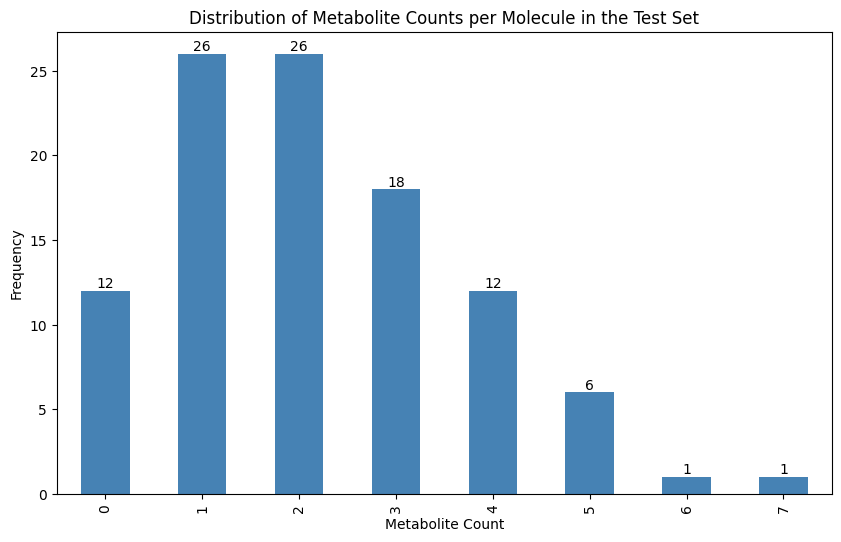

In [109]:
# 'R'로 시작하는 컬럼들 중 값이 있는 경우를 row마다 파악하여 'Metabolite_count' 컬럼 생성
true['Metabolite_count'] = true[r_columns].notna().sum(axis=1)

# 'Metabolite_count' 컬럼의 숫자들의 분포를 구함
count_distribution = true['Metabolite_count'].value_counts().sort_index()

# 분포를 막대그래프로 표현
plt.figure(figsize=(10, 6))
ax = count_distribution.plot(kind='bar', color='#4682B4')
plt.title('Distribution of Metabolite Counts per Molecule in the Test Set')
plt.xlabel('Metabolite Count')
plt.ylabel('Frequency')

# 각 막대 위에 값 표시
for index, value in enumerate(count_distribution):
    plt.text(index, value, str(value), ha='center', va='bottom')

# x축 눈금을 세로로 회전
plt.xticks(rotation=90)

plt.savefig('/content/drive/MyDrive/metabolism_figure/Metabolite count.png', dpi=1000, bbox_inches='tight')
plt.show()

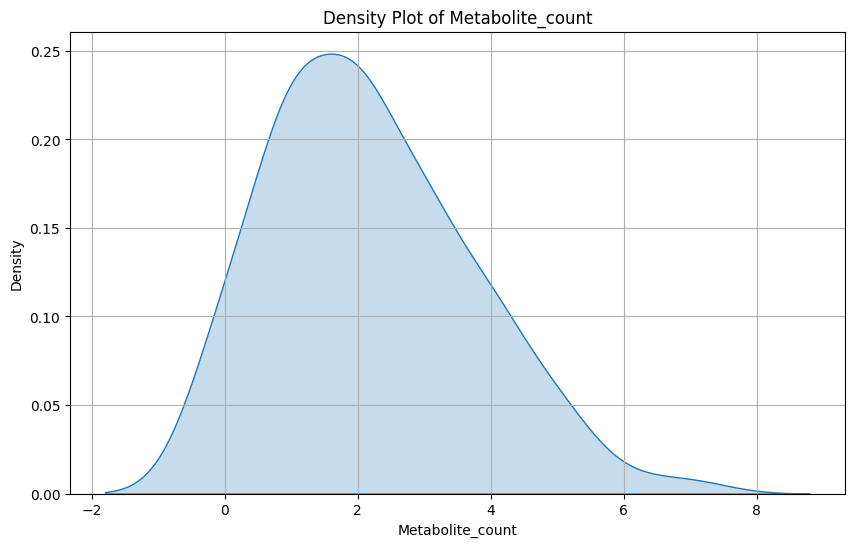

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 밀도 그래프로 표현
plt.figure(figsize=(10, 6))
sns.kdeplot(true['Metabolite_count'], fill=True)
plt.title('Density Plot of Metabolite_count')
plt.xlabel('Metabolite_count')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
df

,model,top_k,sum_tuple,all_metabolites,identified_metabolites,total_pred_metabolites,precision,recall,f1,jaccard_index,subs_accuracy,subs_precision,subs_recall
0,BOM_1A2_thr0.15,99,"(33, 19, 52, 61)",46.43,33,61,0.54,0.63,0.58,0.41,0.56,0.38,0.93
1,1A2_thr0,99,"(24, 28, 52, 37)",32.14,24,37,0.65,0.46,0.54,0.37,0.68,0.45,0.86
2,BOM_2A6_thr0.025,99,"(11, 8, 19, 27)",57.14,11,27,0.41,0.58,0.48,0.31,0.56,0.36,0.75
3,2A6_thr0,99,"(5, 14, 19, 7)",28.57,5,7,0.71,0.26,0.38,0.24,0.68,0.31,0.14
4,BOM_2B6_thr0.05,99,"(23, 10, 33, 43)",50.00,23,43,0.53,0.70,0.61,0.43,0.48,0.34,0.96
5,2B6_thr0,99,"(8, 25, 33, 15)",16.67,8,15,0.53,0.24,0.33,0.20,0.67,0.40,0.43
6,BOM_2C8_thr0.1,99,"(30, 15, 45, 54)",57.69,30,54,0.56,0.67,0.61,0.43,0.49,0.34,0.89
7,2C8_thr0,99,"(16, 29, 45, 28)",23.08,16,28,0.57,0.36,0.44,0.28,0.62,0.39,0.71
8,BOM_2C9_thr0.15,99,"(33, 24, 57, 63)",53.33,33,63,0.52,0.58,0.55,0.38,0.59,0.39,0.89
9,2C9_thr0,99,"(28, 29, 57, 54)",46.67,28,54,0.52,0.49,0.50,0.34,0.54,0.36,0.86
